In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb 

In [2]:
%matplotlib inline

In [3]:
features_rost = ["Z1_E","Z1_pt","Z1_eta","Z1_phi","Z1_m","Z2_E","Z2_pt","Z2_eta","Z2_phi","Z2_m","higgs_E",
                 "higgs_pt","higgs_eta","higgs_phi","higgs_m","DelPhi_Hjj","mH","pT_Hjj","DelEta_jj","EtaProd_jj",
                 "DelY_jj","DelPhi_jj","DelR_jj","Mjj","Mjets","njets","jet1_E","jet1_eta","jet1_y","jet1_phi",
                 "jet1_pt","jet1_m","jet1_isPU","jet2_E","jet2_phi","jet2_eta","jet2_y","jet2_pt","jet2_m",
                 "jet2_isPU","DelPt_jj","minDelR_jZ","DelPt_ZZ","Zeppetaj3","ZeppetaZZ","jet3_E","jet3_eta",
                 "jet3_phi","jet3_pt","jet3_m","jet3_isPU"]

In [4]:
features_new = ["minDelR_jZ", "DelPhi_Hjj", "DelEta_Hjj", "DelPhi_jj", "DelR_jj", "DelY_jj", "Mjj", "DelPt_jj",
                "DelPt_ZZ", "pT_Hjj", "Mjets", "Zeppetaj3", "ZeppetaZZ", "njets","Z1_E","Z1_pt","Z1_eta","Z1_phi",
                "Z1_m","Z2_E","Z2_pt","Z2_eta","Z2_phi","Z2_m",  "higgs_E","higgs_pt","higgs_eta","higgs_phi",
                "higgs_m", "jet1_E","jet1_eta","jet1_y","jet1_phi","jet1_pt","jet1_m","jet2_E", "jet2_eta",
                "jet2_y", "jet2_phi","jet2_pt","jet2_m","jet3_E","jet3_eta","jet3_y" ,"jet3_phi","jet3_pt",
                "jet3_m"]

In [5]:
data_rost = np.loadtxt("/afs/cern.ch/work/j/jpavezse/private/data/old/data_S_1_m1_0.dat")

In [6]:
data_new = np.loadtxt("/afs/cern.ch/user/j/jpavezse/systematics/data/mlp/2BSM/old/data_F1.dat")

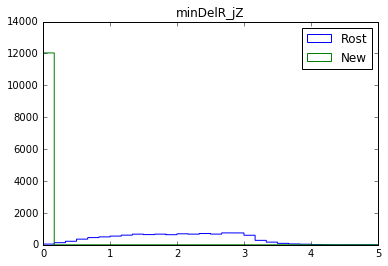

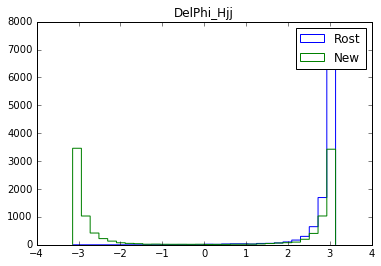

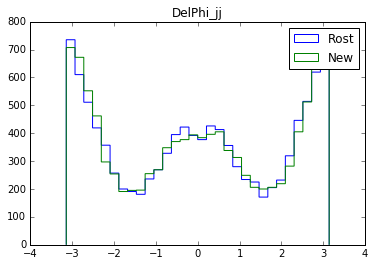

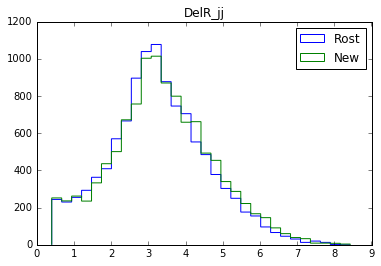

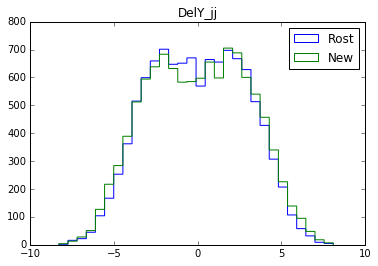

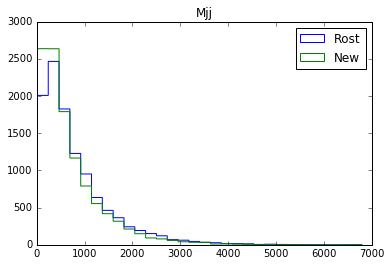

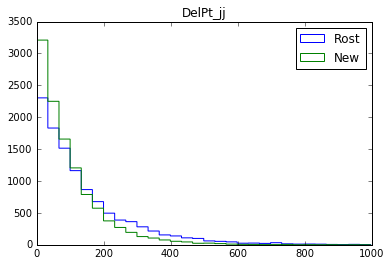

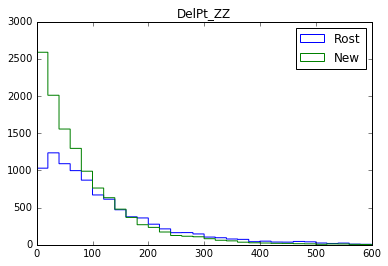

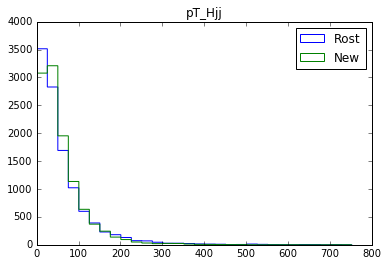

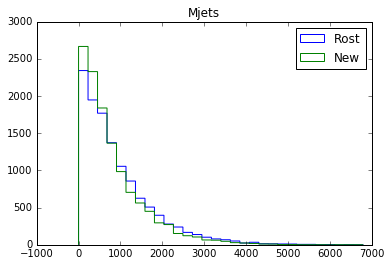

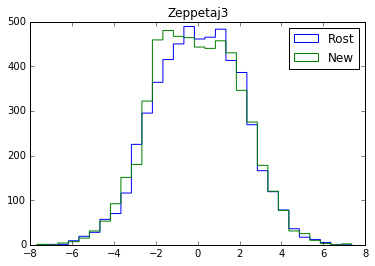

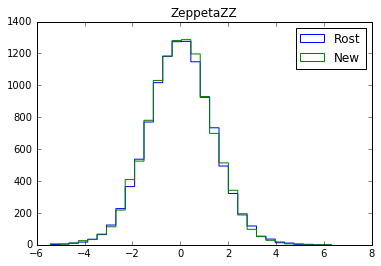

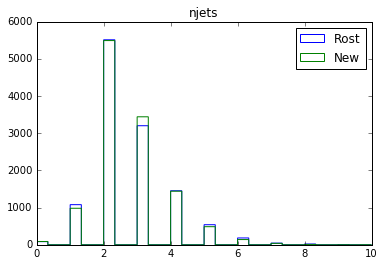

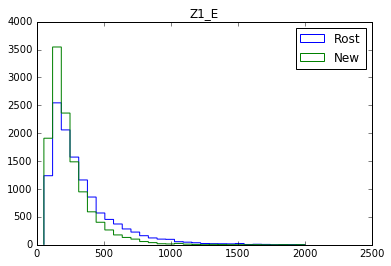

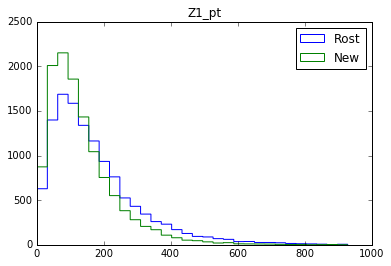

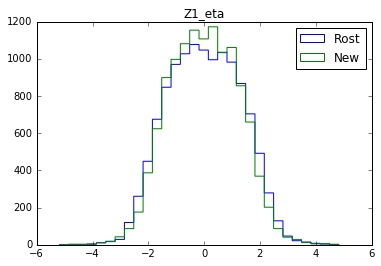

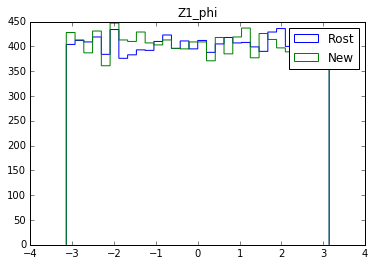

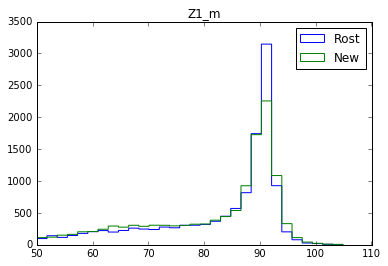

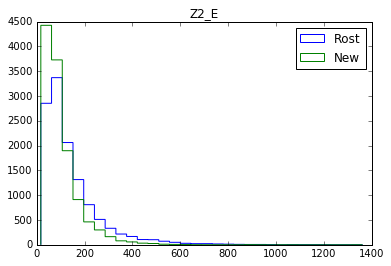

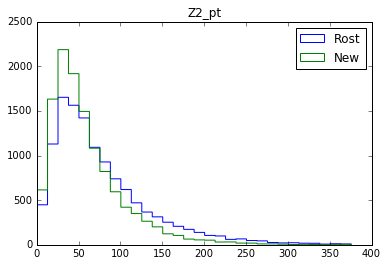

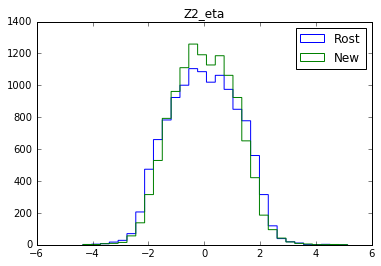

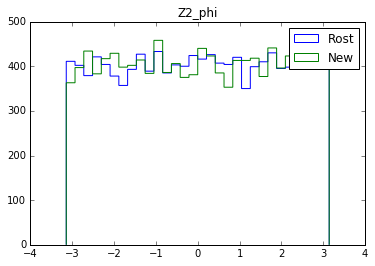

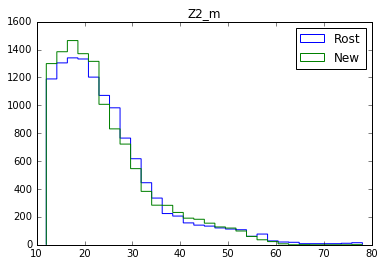

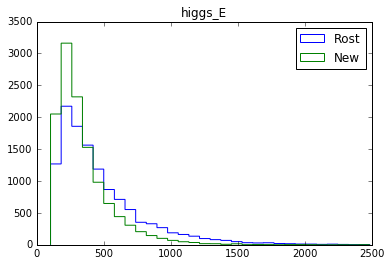

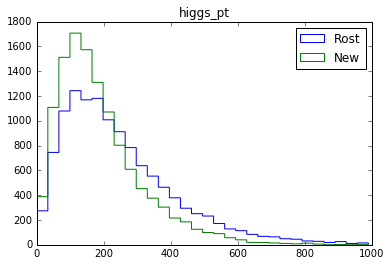

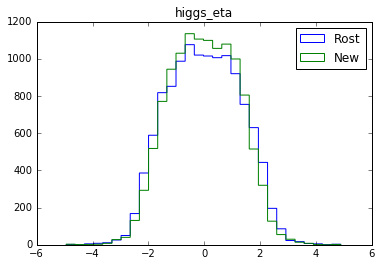

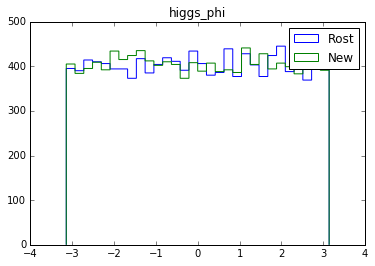

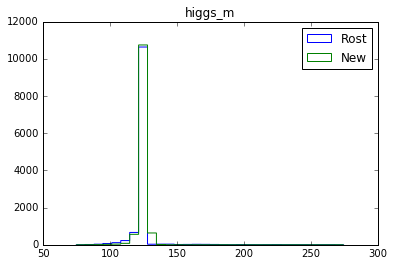

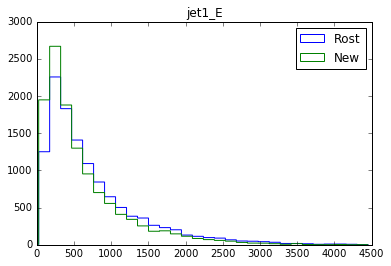

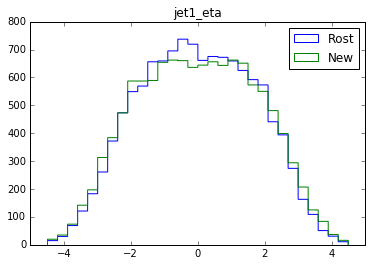

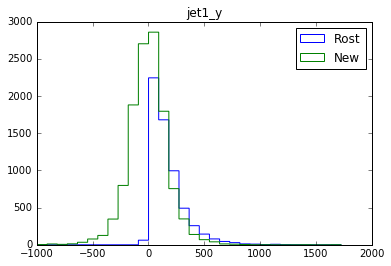

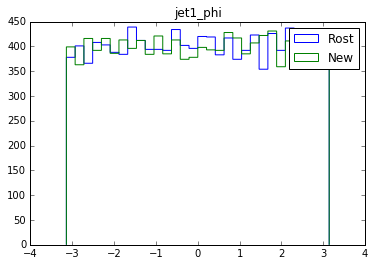

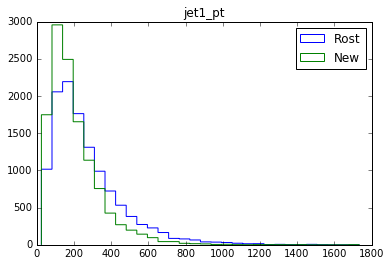

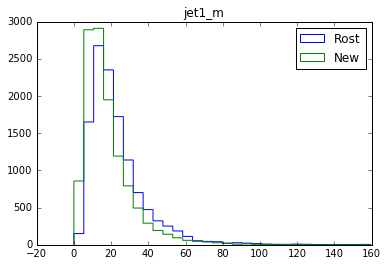

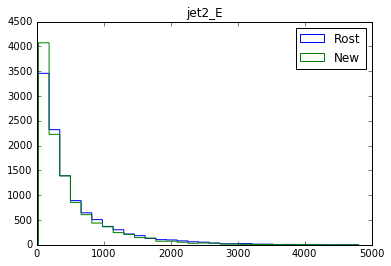

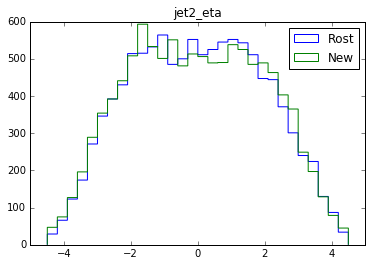

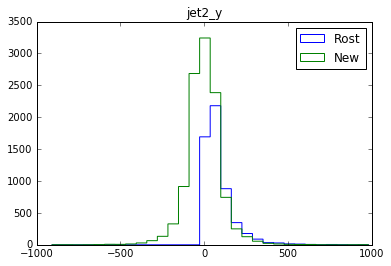

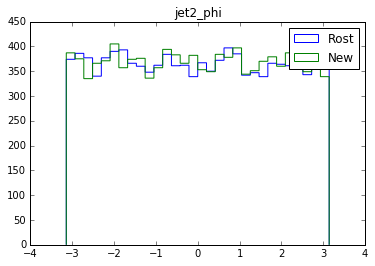

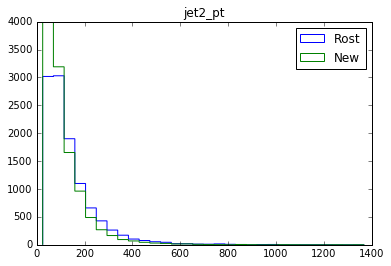

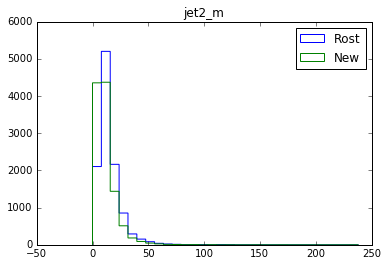

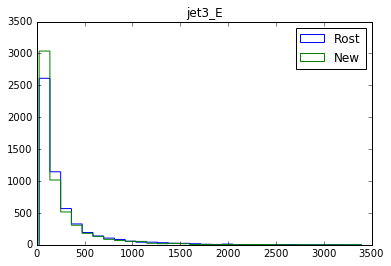

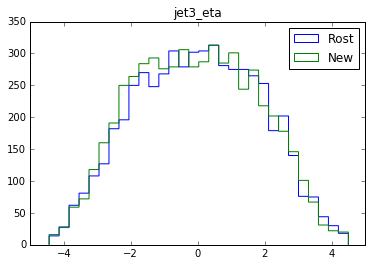

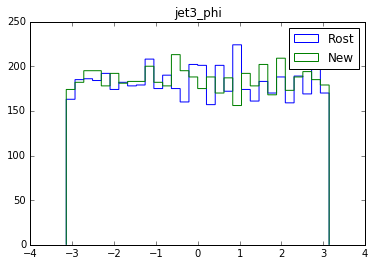

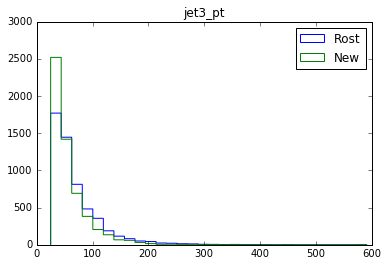

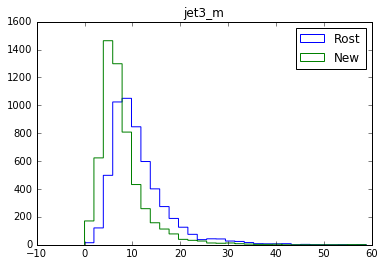

In [7]:
num_data = min(data_rost.shape[0], data_new.shape[0])
data_rost = data_rost[:num_data]
data_new = data_new[:num_data]
for k,f in enumerate(features_new):
    if f not in features_rost:
        continue
    rost_idx = features_rost.index(f)
    #plt.subplot(2,1,1)
    plt.title(f)
    if f == "DelPt_ZZ":
        x_range = (0.,600.)
    elif f <> "minDelR_jZ":
        x_range = (min(data_new[:,k][data_new[:,k] > -999.]), max(data_new[:,k][data_new[:,k] > -999.]))
    else:
        x_range = (0.,5.)
    if f in ["DelPt_jj", "jet1_y", "jet2_y", "jet3_y","DelPt_ZZ"]:
        plt.hist(data_rost[:,rost_idx][data_rost[:,rost_idx] > -999.]/1000., range=x_range, 
                 bins=30, histtype="step", label='Rost')
    else:
        plt.hist(data_rost[:,rost_idx][data_rost[:,rost_idx] > -999.], range=x_range,
                 bins=30, histtype="step", label='Rost')
    #plt.legend()
    #plt.subplot(2,1,2)
    if f == "DelPt_ZZ":
        plt.hist(np.abs(data_new[:,k][data_new[:,k] > -999.]), bins=30, range=(x_range),
                 histtype="step", label='New')
    else:
        plt.hist(data_new[:,k][data_new[:,k] > -999.], range=x_range, bins=30, histtype="step", label='New')
    plt.legend()
    plt.show()